# 希尔伯特矩阵及其逆
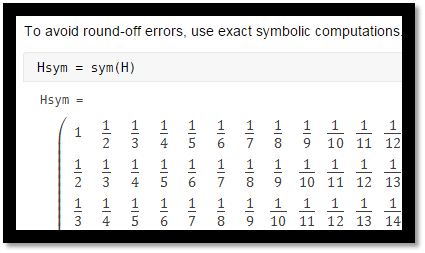
定义:希尔伯特矩阵是以元素为单位分数的方阵。符号计算给出了这些病态矩阵的精确结果，而纯数值方法则失败了。创建一个10乘10的数字希尔伯特矩阵。

In [1]:
import math
import numpy as np
H= 1. / (np.arange(1,11) + np.arange(0, 10)[:, np.newaxis])
print(H)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

求这个矩阵的条件数。希尔伯特矩阵是病态的，这意味着它们具有大的条件数，表明这种矩阵几乎是奇异的。请注意，计算条件数也容易出现数字错误。

In [2]:
print(np.linalg.cond(H))

16025028168113.176


因此，对希尔伯特矩阵求逆在数值上是不稳定的。当你计算矩阵的逆矩阵时，H*inv(H)必须返回一个单位矩阵或在一定误差范围内接近单位矩阵的矩阵。
首先，计算的倒数H通过使用inv功能。数值不稳定。

In [3]:
print(H*np.linalg.inv(H))

[[ 9.99965762e+01 -2.47485203e+03  2.63978983e+04 -1.50135668e+05
   5.04449304e+05 -1.05092470e+06  1.37262379e+06 -1.09380100e+06
   4.86130471e+05 -9.23642393e+04]
 [-2.47485208e+03  1.08891478e+05 -1.47001386e+06  9.51251393e+06
  -3.46807148e+07  7.64385283e+07 -1.04040641e+08  8.55597686e+07
  -3.89829774e+07  7.55712042e+06]
 [ 2.63978996e+04 -1.47001391e+06  2.25791853e+07 -1.58540836e+08
   6.11510604e+08 -1.40455566e+09  1.97291943e+09 -1.66328519e+09
   7.73218726e+08 -1.52402643e+08]
 [-1.50135681e+05  9.51251449e+06 -1.58540841e+08  1.17772561e+09
  -4.73388395e+09  1.12210168e+10 -1.61582136e+10  1.38989151e+10
  -6.56939378e+09  1.31301224e+09]
 [ 5.04449367e+05 -3.46807179e+07  6.11510639e+08 -4.73388408e+09
   1.96368009e+10 -4.77173213e+10  7.01079628e+10 -6.13145612e+10
   2.93874113e+10 -5.94374289e+09]
 [-1.05092487e+06  7.64385375e+07 -1.40455578e+09  1.12210174e+10
  -4.77173225e+10  1.18307298e+11 -1.76730511e+11  1.56733239e+11
  -7.60175732e+10  1.55330199e+10

为了避免舍入误差，请使用精确的符号计算。为此，创建符号希尔伯特矩阵。

In [4]:
from __future__ import division
import numpy as np
import sympy as sym
from sympy import *
def hilmat(a,b):
    li=[]
    for i in range(a):
      for j in range(b):
        ele=Rational(1,(i+j+1))
        li.insert(a*i+i+j+1,ele)
    h=np.mat(li)
    h=h.reshape(a,b)
    return h
H=hilmat(10,10)
H=sym.Matrix(H)
print(H)

Matrix([[1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10], [1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11], [1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12], [1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13], [1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14], [1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15], [1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16], [1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17], [1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17, 1/18], [1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17, 1/18, 1/19]])


符号计算下可得到Hibert逆矩阵的精确结果，你举证乘以Hilbert矩阵结果为单位矩阵：

In [5]:
HH=H.inv()
print(H*HH)

Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
